In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
customized_path = "/content/drive/Shareddrives/Urban Computing Project/"
sys.path.append(customized_path)

In [3]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df1 = pd.read_csv('/content/drive/Shareddrives/Urban Computing Project/datasets/junbusfinal.csv', index_col=0, parse_dates=True)
df2 = pd.read_csv('/content/drive/Shareddrives/Urban Computing Project/datasets/juntaxifinal.csv', index_col=0, parse_dates=True)

In [5]:
df1.rename(columns = {'RecordedAtTime':'time'}, inplace = True)

In [6]:
df1.set_index(['time', 'zone'])

late  time_difference
time                zone                                            
2017-06-01 00:00:00 Allerton/Pelham Gardens       4       -71.000000
                    Alphabet City                 2      -143.500000
                    Arrochar/Fort Wadsworth       2      -267.000000
                    Auburndale                    3        30.333333
                    Bath Beach                    2       -17.500000
...                                             ...              ...
2017-06-30 23:50:00 Williamsburg (South Side)     7      -829.000000
                    Windsor Terrace               3      -269.666667
                    Woodlawn/Wakefield            6      -192.000000
                    World Trade Center            2      -399.000000
                    Yorkville East                2      -225.000000

[778981 rows x 2 columns]

In [7]:
df1.head()

,time,zone,late,time_difference
0,2017-06-01 00:00:00,Allerton/Pelham Gardens,4,-71.000000
1,2017-06-01 00:00:00,Alphabet City,2,-143.500000
2,2017-06-01 00:00:00,Arrochar/Fort Wadsworth,2,-267.000000
3,2017-06-01 00:00:00,Auburndale,3,30.333333
4,2017-06-01 00:00:00,Bath Beach,2,-17.500000


In [8]:
df2.rename(columns = {'tpep_pickup_datetime':'time'}, inplace = True)

In [9]:
df2.set_index(['time', 'zone'])

trip_time  ...  taxi_count
time                zone                                    ...            
2017-06-01 00:00:00 Alphabet City               939.000000  ...           3
                    Astoria                     312.500000  ...           4
                    Bath Beach                  576.000000  ...           1
                    Battery Park                964.000000  ...           1
                    Battery Park City           951.666667  ...           6
...                                                    ...  ...         ...
2017-06-30 23:50:00 Williamsburg (South Side)   707.750000  ...           8
                    Woodside                    483.500000  ...           2
                    World Trade Center         1023.294118  ...          17
                    Yorkville East              718.000000  ...           4
                    Yorkville West              582.365854  ...          41

[372964 rows x 5 columns]

In [10]:
df2.head()

,time,zone,trip_time,passenger_count,trip_distance,total_amount,taxi_count
0,2017-06-01 00:00:00,Alphabet City,939.000000,1.000000,3.110000,16.573333,3
1,2017-06-01 00:00:00,Astoria,312.500000,1.000000,1.172500,7.465000,4
2,2017-06-01 00:00:00,Bath Beach,576.000000,1.000000,4.700000,16.300000,1
3,2017-06-01 00:00:00,Battery Park,964.000000,1.000000,3.760000,15.300000,1
4,2017-06-01 00:00:00,Battery Park City,951.666667,1.666667,3.143333,18.971667,6


In [11]:
df = df2.join(df1, rsuffix='_right')

In [12]:
df.head()

,time,zone,trip_time,passenger_count,trip_distance,total_amount,taxi_count,time_right,zone_right,late,time_difference
0,2017-06-01 00:00:00,Alphabet City,939.000000,1.000000,3.110000,16.573333,3,2017-06-01 00:00:00,Allerton/Pelham Gardens,4,-71.000000
1,2017-06-01 00:00:00,Astoria,312.500000,1.000000,1.172500,7.465000,4,2017-06-01 00:00:00,Alphabet City,2,-143.500000
2,2017-06-01 00:00:00,Bath Beach,576.000000,1.000000,4.700000,16.300000,1,2017-06-01 00:00:00,Arrochar/Fort Wadsworth,2,-267.000000
3,2017-06-01 00:00:00,Battery Park,964.000000,1.000000,3.760000,15.300000,1,2017-06-01 00:00:00,Auburndale,3,30.333333
4,2017-06-01 00:00:00,Battery Park City,951.666667,1.666667,3.143333,18.971667,6,2017-06-01 00:00:00,Bath Beach,2,-17.500000


In [13]:
import gc
del [[df1,df2]]
gc.collect()

236

In [14]:
coi = ['time', 'zone', 'trip_time', 'passenger_count', 'trip_distance', 'total_amount', 'taxi_count', 'late']
df = df[coi]

In [15]:
df.head()

,time,zone,trip_time,passenger_count,trip_distance,total_amount,taxi_count,late
0,2017-06-01 00:00:00,Alphabet City,939.000000,1.000000,3.110000,16.573333,3,4
1,2017-06-01 00:00:00,Astoria,312.500000,1.000000,1.172500,7.465000,4,2
2,2017-06-01 00:00:00,Bath Beach,576.000000,1.000000,4.700000,16.300000,1,2
3,2017-06-01 00:00:00,Battery Park,964.000000,1.000000,3.760000,15.300000,1,3
4,2017-06-01 00:00:00,Battery Park City,951.666667,1.666667,3.143333,18.971667,6,2


In [16]:
df['time'] = pd.to_datetime(df['time'], errors = 'coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df['month'] = df['time'].dt.month
df['day_of_week'] = df['time'].dt.dayofweek
df['day'] = df['time'].dt.day

In [18]:
df.head()

,time,zone,trip_time,passenger_count,trip_distance,total_amount,taxi_count,late,month,day_of_week,day
0,2017-06-01,Alphabet City,939.000000,1.000000,3.110000,16.573333,3,4,6,3,1
1,2017-06-01,Astoria,312.500000,1.000000,1.172500,7.465000,4,2,6,3,1
2,2017-06-01,Bath Beach,576.000000,1.000000,4.700000,16.300000,1,2,6,3,1
3,2017-06-01,Battery Park,964.000000,1.000000,3.760000,15.300000,1,3,6,3,1
4,2017-06-01,Battery Park City,951.666667,1.666667,3.143333,18.971667,6,2,6,3,1


In [19]:
coi = ['day', 'day_of_week','month', 'zone', 'trip_time', 'passenger_count', 'taxi_count', 'late']
df = df[coi]

In [20]:
df.head()

,day,day_of_week,month,zone,trip_time,passenger_count,taxi_count,late
0,1,3,6,Alphabet City,939.000000,1.000000,3,4
1,1,3,6,Astoria,312.500000,1.000000,4,2
2,1,3,6,Bath Beach,576.000000,1.000000,1,2
3,1,3,6,Battery Park,964.000000,1.000000,1,3
4,1,3,6,Battery Park City,951.666667,1.666667,6,2


In [21]:
df.isnull().values.any()

False

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['zone']= label_encoder.fit_transform(df['zone'])
df.head()

,day,day_of_week,month,zone,trip_time,passenger_count,taxi_count,late
0,1,3,6,1,939.000000,1.000000,3,4
1,1,3,6,3,312.500000,1.000000,4,2
2,1,3,6,7,576.000000,1.000000,1,2
3,1,3,6,8,964.000000,1.000000,1,3
4,1,3,6,9,951.666667,1.666667,6,2


In [23]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=298121
Testing data set length=74843


In [24]:
print(df_train.shape, df_test.shape)

(298121, 8) (74843, 8)


In [25]:
expr = """late ~ day + day_of_week + zone + taxi_count"""

In [26]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [27]:
print(X_train.shape, X_test.shape)

(298121, 5) (74843, 5)


In [28]:
X_train.head()

,Intercept,day,day_of_week,zone,taxi_count
0,1.0,1.0,3.0,1.0,3.0
1,1.0,1.0,3.0,3.0,4.0
2,1.0,1.0,3.0,7.0,1.0
3,1.0,1.0,3.0,8.0,1.0
5,1.0,1.0,3.0,13.0,1.0


In [29]:
_, X_test = X_train.align(X_test, join='left', axis=1)

In [30]:
X_test.head()

,Intercept,day,day_of_week,zone,taxi_count
4,1.0,1.0,3.0,9.0,6.0
15,1.0,1.0,3.0,41.0,8.0
16,1.0,1.0,3.0,44.0,57.0
19,1.0,1.0,3.0,48.0,1.0
23,1.0,1.0,3.0,63.0,43.0


In [31]:
print(X_train.shape, X_test.shape)

(298121, 5) (74843, 5)


In [32]:
print(y_train.shape, y_test.shape)

(298121, 1) (74843, 1)


In [33]:
y_train.head()

,late
0,4.0
1,2.0
2,2.0
3,3.0
5,1.0


In [34]:
y_test.head()

,late
4,2.0
15,2.0
16,8.0
19,2.0
23,1.0


In [35]:
# del [[df_train,df_test, df]]
# gc.collect()

###Poisson Regression

In [36]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [37]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   late   No. Observations:               298121
Model:                            GLM   Df Residuals:                   298116
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6768e+06
Date:                Mon, 13 Dec 2021   Deviance:                   2.3666e+06
Time:                        08:24:01   Pearson chi2:                 4.03e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.8839      0.002    825.415      

In [38]:
poisson_predictions = poisson_training_results.get_prediction(X_test)

In [39]:
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

            mean   mean_se  mean_ci_lower  mean_ci_upper
4       7.045773  0.012625       7.021073       7.070561
15      7.047037  0.011401       7.024726       7.069419
16      7.147887  0.012622       7.123192       7.172668
19      7.032090  0.011356       7.009869       7.054382
23      7.117150  0.011156       7.095318       7.139049
...          ...       ...            ...            ...
372945  7.466377  0.015438       7.436179       7.496697
372947  7.277576  0.012377       7.253357       7.301875
372949  7.468172  0.015615       7.437631       7.498839
372951  7.336605  0.012048       7.313029       7.360258
372953  7.321504  0.012115       7.297799       7.345287

[74843 rows x 4 columns]


In [40]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['late']

In [41]:
print(predicted_counts)

4         7.045773
15        7.047037
16        7.147887
19        7.032090
23        7.117150
            ...   
372945    7.466377
372947    7.277576
372949    7.468172
372951    7.336605
372953    7.321504
Name: mean, Length: 74843, dtype: float64


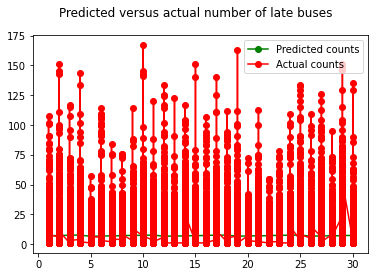

In [42]:
fig = plt.figure()
fig.suptitle('Predicted versus actual number of late buses')
predicted, = plt.plot(X_test['day'], predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test['day'], actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

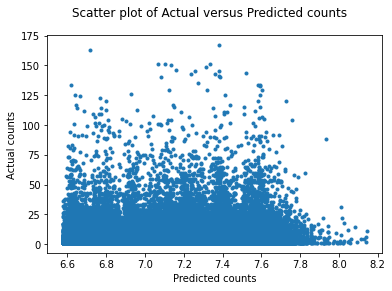

In [43]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

###Negative Binomial Regression

In [44]:
df_train['BB_LAMBDA'] = poisson_training_results.mu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['late'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""

In [47]:
aux_olsr_results = smf.ols(ols_expr, df_train).fit()

In [48]:
print(aux_olsr_results.params)

BB_LAMBDA    1.750609
dtype: float64


In [49]:
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [50]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   late   No. Observations:               298121
Model:                            GLM   Df Residuals:                   298116
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.3321e+05
Date:                Mon, 13 Dec 2021   Deviance:                   1.6902e+05
Time:                        08:24:10   Pearson chi2:                 2.99e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.8838      0.008    226.368      

In [51]:
nb2_predictions = nb2_training_results.get_prediction(X_test)

In [52]:
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

            mean   mean_se  mean_ci_lower  mean_ci_upper
4       7.029034  0.046211       6.939043       7.120193
15      7.030162  0.041721       6.948864       7.112411
16      7.126731  0.046311       7.036538       7.218080
19      7.015826  0.041552       6.934857       7.097740
23      7.097252  0.040890       7.017559       7.177850
...          ...       ...            ...            ...
372945  7.475906  0.057179       7.364673       7.588818
372947  7.294291  0.045746       7.205179       7.384506
372949  7.477621  0.057828       7.365136       7.591825
372951  7.351079  0.044553       7.264273       7.438921
372953  7.336544  0.044786       7.249289       7.424850

[74843 rows x 4 columns]


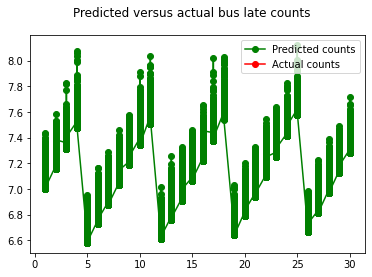

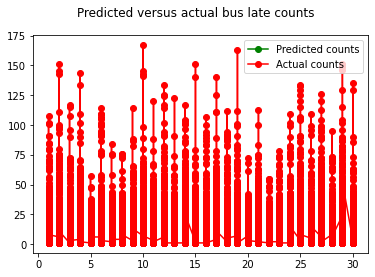

In [53]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['late']
fig = plt.figure()
fig.suptitle('Predicted versus actual bus late counts')
predicted, = plt.plot(X_test['day'], predicted_counts, 'go-', label='Predicted counts')
#actual, = plt.plot(X_test['day'], actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['late']
fig = plt.figure()
fig.suptitle('Predicted versus actual bus late counts')
#predicted, = plt.plot(X_test['day'], predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test['day'], actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

###Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [56]:
rf.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [57]:
predictions = rf.predict(X_test)

In [58]:
print(predictions.shape,y_test.shape)

(74843,) (74843, 1)


In [59]:
print(type(predictions), type(y_test))

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [60]:
y_test = y_test.to_numpy().reshape(y_test.shape[0], )

In [61]:
errors = abs(predictions - y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 6.12 degrees.


In [62]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

-0.17378771553080385

In [63]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

6.115222402353113